# Support Vector Machine Basic Implementation

The objective of this program is to generate a basic dataset and apply a support vector machine (SVM) classifier. This basic dataset enables the demonstration of some of the fundamental mathematical principles underpinning SVM classifiers.

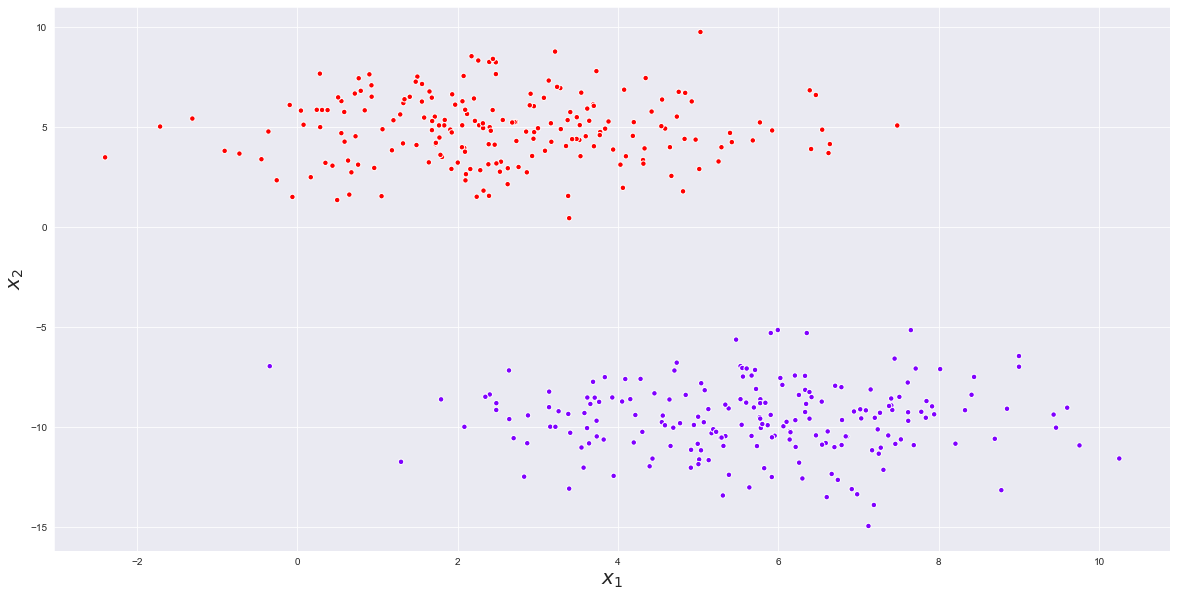

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# generate data set at random: 500 points, 2 clusters
X, y = make_blobs(n_samples = 500, centers = 2, random_state = 10,
                  cluster_std = 1.8)

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=8)

# plot training data points
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'rainbow', s = 30,
           edgecolors = 'white')
ax.set_xlabel(r'$x_1$', fontsize = 20)
ax.set_ylabel(r'$x_2$', fontsize = 20)
plt.show()

The y=0 and y=1 samples are linearly separable and well suited to an SVM classifier. We will create an SVM classifier that utilises a linear kernel and fit it the training data. We can then make predictions for the y test data. We will not bother with regularisation. 

In [5]:
# generate SVM classifier
svc = SVC(kernel = 'linear')
# fit to data
svc.fit(X_train, y_train)
# predict y_test
y_pred = svc.predict(X_test)

The classification report and confusion matrix help us to guage the performance of the model.

In [6]:
# generate confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Model performance is perfect due to the simplicity of the data.

Next we will plot the SVM hyperplane. The idea is to generate a grid of points, apply decision_function to the grid and use a contour plot to display the hyperplane and margins. Finally, we will identify the support vectors on the plot.

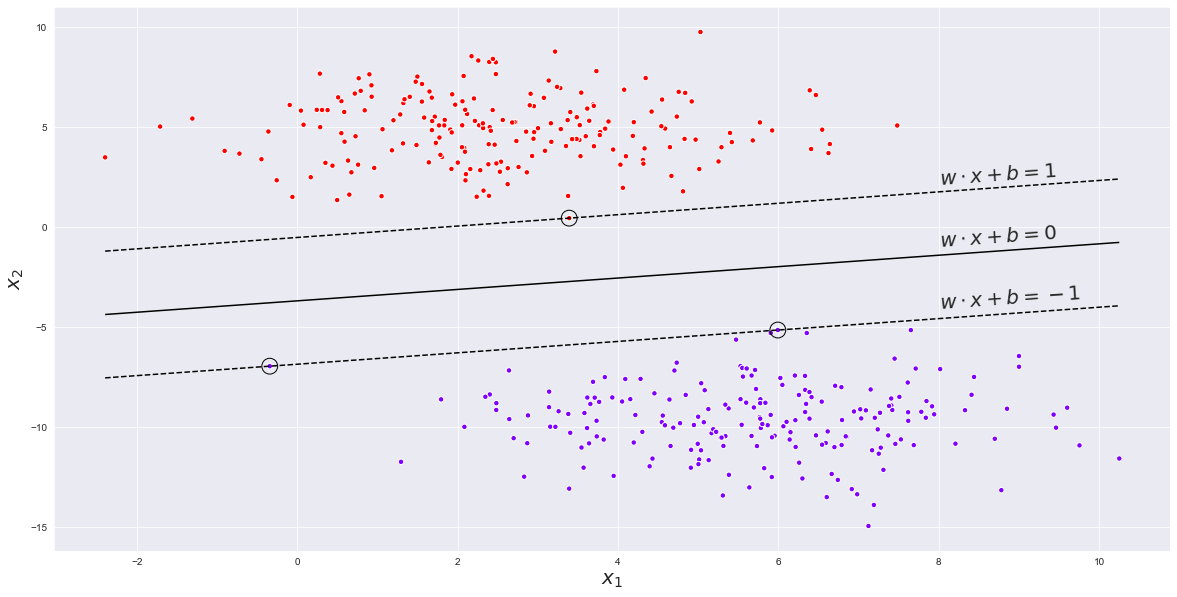

In [23]:
# plot hyperplane
# this is done with a contour plot which requires a grid to be generated with
# np.meshgrid
x1_min = min(X_train[:,0])
x1_max = max(X_train[:,0])
x2_min = min(X_train[:,1])
x2_max = max(X_train[:,1])
x1 = np.linspace(x1_min, x1_max, 100)
x2 = np.linspace(x2_min, x2_max, 100)
# generate a grid of x a and y points
X1, X2 = np.meshgrid(x1, x2)
# arrange into a format that can be accepted by sklearn
# unravel X1 and Y1 into 1D arrays ans vertically stack them
points = np.vstack([X1.ravel(), X2.ravel()]).T

# evaluate the decision function for 'points' and reshape into the shape of the grid
boundary = svc.decision_function(points).reshape(X1.shape)

sns.set_style('darkgrid')
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'rainbow', s = 30,
           edgecolors = 'white')
ax.set_xlabel(r'$x_1$', fontsize = 20)
ax.set_ylabel(r'$x_2$', fontsize = 20)

# decision boundary occurs at w*x+b=0
# margins occur at w*x+b=1 and w*x+b=-1
# these are represented by the contour levels
ax.contour(X1, X2, boundary, colors = 'k', levels = [-1, 0, 1],
           linestyles = ['--', '-', '--'])

# get support vectors
support_vecs = svc.support_vectors_
# plot support vectors
ax.scatter(support_vecs[:,0], support_vecs[:,1], s = 250, linewidth = 1,
           facecolors = 'none', edgecolors = 'k')
ax.text(8, -1, r'$w \cdot x + b = 0$', rotation = 4, fontsize = 20)
ax.text(8, 2.1, r'$w \cdot x + b = 1$', rotation = 4, fontsize = 20)
ax.text(8, -4.1, r'$w \cdot x + b = -1$', rotation = 4, fontsize = 20)
plt.show()

Finally, we will determine the equation of the hyperplane and calculate the margin width using two distinct methods. The distance between the hyperplane and the margin in a SVM problem can be shown to be $$\frac{1}{||\omega||}$$

where $\omega$ is the vector normal to the hyperplane, used to define the hyperplane (and margins).

In [27]:
weights = svc.coef_[0]
intercept = svc.intercept_[0]
print(weights)
print(intercept)

[-0.08997192  0.31534043]
1.1613822059809598


The hyperplane equation is $-0.09x_1 + 0.32x_2 + 1.16 = 0$ 

In [28]:
# calculate margin width
# start off with defining function for determining magnitude of vector
def vector_mag(w):
    return np.sqrt(sum(w**2))

print('1/|w| = {:.2f}'.format(1/vector_mag(weights)))

1/|w| = 3.05


Determining the margin width from scratch involves calculating the distance between a point on the margin (support vector) and the hyperplane. The function defined below first calculates the distance between the hyperplane and the origin before defining a plane parallel to the hyperplane which passes through the specified support vector, i.e., the margin, and calculating its distance to the origin. The distance between the two parallel planes is then easily found. 

In [29]:
# define function to calculate distance between a point and the hyperplane

def calc_distance(sv, weights, b):
    sv_x = sv[0]
    sv_y = sv[1]
    c1, c2 = weights[0], weights[1]

    # plane equation c1*x1 + c2*x2 = -b
    # calculate distance between hyperplane and origin
    vector = np.array([c1, c2])
    mag = vector_mag(vector)
    distance = -b/mag
    # find equation of plane parallel to original plane that passes through the support vector
    c3 = c1*sv_x
    c4 = c2*sv_y
    b2 = c3 + c4
    distance2 = b2/mag
    # calculate distance between the two planes
    return abs(distance - distance2)

margin_width = calc_distance(support_vecs[1], weights, intercept)
print('Calculated margin width from scratch: {:.2f}'.format(margin_width))

Calculated margin width from scratch: 3.05


As expected, this value is equal to the one calculated earlier.